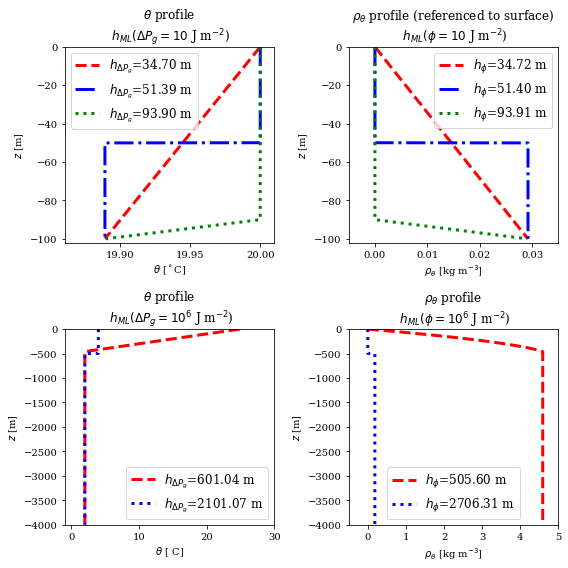

In [1]:
from oceanmixedlayers import oceanmixedlayers
import matplotlib.pyplot as plt
import matplotlib as mpl
from Paths import Figure_Save_Path
plt.rcParams["font.family"] = "Serif"
%matplotlib inline

EOS='gsw'

A=oceanmixedlayers.column(kind='idealized',idealized_type='linear',EOS=EOS,
                          T0=20,dTdz=(0.03/100)/0.27,S0=35,Sb0=35,nz=1000,Dpt=100)
B=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS=EOS,
                          T0=20,Tb0=20-(0.03)/0.27,S0=35,Sb0=35,nz=1000,Dpt=100)
C=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS=EOS,
                          T0=20,Tb0=20,dTdz=(0.03/(100*0.1))/0.27,S0=35,Sb0=35,nz=1000,Dpt=100,mixedfrac=0.9)

F,ax = plt.subplots(2,2,figsize=(8,8))

AX=ax.ravel()[0]
AX.plot(A.T,A.zc,'r--',linewidth=3,label=r'$h_{\Delta P_g}$'+'={:3.2f} m'.format(A.mld_delta_pe(energy=10,eqstate=EOS)[0]))
AX.plot(B.T,B.zc,'b-.',linewidth=3,label=r'$h_{\Delta P_g}$'+'={:3.2f} m'.format(B.mld_delta_pe(energy=10,eqstate=EOS)[0]))
AX.plot(C.T,C.zc,'g:',linewidth=3,label=r'$h_{\Delta P_g}$'+'={:3.2f} m'.format(C.mld_delta_pe(energy=10,eqstate=EOS)[0]))
AX.set_xlabel(r'$\theta$ [$^\circ$C]')
AX.set_ylabel('$z$ [m]')
AX.set_title(r'$\theta$ profile'+'\n $h_{ML}(\Delta P_g=10$ J m$^{-2}$)')
AX.legend(fontsize=12)
AX.set_ylim(-102,0)
AX.set_xlim(19.86,20.01)

AX=ax.ravel()[1]
AX.plot(A.prho-A.prho[0],A.zc,'r--',linewidth=3,label='$h_\phi$={:3.2f} m'.format(A.mld_pe_anomaly(energy=10)[0]))
AX.plot(B.prho-B.prho[0],B.zc,'b-.',linewidth=3,label='$h_\phi$={:3.2f} m'.format(B.mld_pe_anomaly(energy=10)[0]))
AX.plot(C.prho-C.prho[0],C.zc,'g:',linewidth=3,label='$h_\phi$={:3.2f} m'.format(C.mld_pe_anomaly(energy=10)[0]))
AX.set_xlabel(r'$\rho_\theta$ [kg m$^{-3}$]')
AX.set_ylabel('$z$ [m]')
AX.set_title(r'$\rho_\theta$ profile (referenced to surface)'+'\n $h_{ML}(\phi=10$ J m$^{-2}$)')
AX.legend(fontsize=12)
AX.set_ylim(-102,0)
AX.set_xlim(-0.005,0.035)

A=oceanmixedlayers.column(kind='idealized',idealized_type='linear',EOS=EOS,
                          T0=25,dTdz=0.05,S0=35,Sb0=35,nz=1000,Dpt=4000,Tmin=2)
C=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS=EOS,
                          T0=4,Tb0=2,dTdz=0,S0=35,Sb0=35,nz=1000,Dpt=4000,mixedfrac=0.125)


AX=ax.ravel()[2]
AX.plot(A.T,A.zc,'r--',linewidth=3,
        label=r'$h_{\Delta P_g}$'+'={:3.2f} m'.format(A.mld_delta_pe(energy=1000000,eqstate=EOS)[0]))
AX.plot(C.T,C.zc,'b:',linewidth=3,
        label=r'$h_{\Delta P_g}$'+'={:3.2f} m'.format(C.mld_delta_pe(energy=1000000,eqstate=EOS)[0]))
AX.set_xlabel(r'$\theta$ [ C]')
AX.set_ylabel('$z$ [m]')
AX.set_title(r'$\theta$ profile'+'\n $h_{ML}(\Delta P_g=10^6$ J m$^{-2}$)')
AX.legend(fontsize=12)
AX.set_ylim(-4002,0)
AX.set_xlim(-1,30.01)

AX=ax.ravel()[3]
AX.plot(A.prho-A.prho[0],A.zc,'r--',linewidth=3,
        label='$h_\phi$={:3.2f} m'.format(A.mld_pe_anomaly(energy=1000000)[0]))
AX.plot(C.prho-C.prho[0],C.zc,'b:',linewidth=3,
        label='$h_\phi$={:3.2f} m'.format(C.mld_pe_anomaly(energy=1000000)[0]))
AX.set_xlabel(r'$\rho_\theta$ [kg m$^{-3}$]')
AX.set_ylabel('$z$ [m]')
AX.set_title(r'$\rho_\theta$ profile'+'\n $h_{ML}(\phi=10^6$ J m$^{-2}$)')
AX.legend(fontsize=12,loc=8)
AX.set_ylim(-4002,0)
AX.set_xlim(-0.5,5)




F.tight_layout()

F.savefig(Figure_Save_Path+'/Figure5_Idealized_profiles.png');


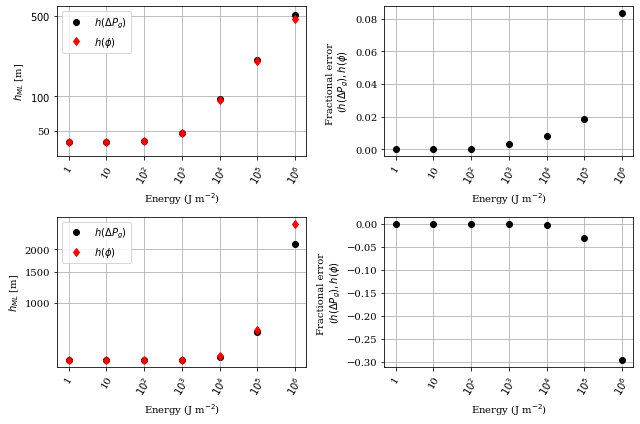

In [2]:
import numpy as np
F,ax = plt.subplots(2,2,figsize=(9,6))
SZ=80

hi=0
for H in [4000]:
    hi+=1
    ei=0
    for energy in [1,10,100,1000,10000,100000,1000000]:
        ei+=1
        A=oceanmixedlayers.column(kind='idealized',idealized_type='linear',EOS='gsw',
                                  T0=30,dTdz=0.05,S0=35,Sb0=35,nz=100,Dpt=H,Tmin=2)
        C=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',EOS='gsw',
                                  T0=4,Tb0=2,dTdz=0.0,
                                  S0=35,Sb0=35,nz=100,Dpt=H,mixedfrac=0.125)

        SK=0
        for h_D,h_P in[[A.mld_delta_pe(energy=energy)[0],
                        A.mld_pe_anomaly(energy=energy)[0]],
                       [C.mld_delta_pe(energy=energy)[0],
                        C.mld_pe_anomaly(energy=energy)[0]]]:
                       
            AX=ax.ravel()[0+SK]
            AX.plot(ei,np.log10(h_D),'ko',label=r'$h(\Delta P_g)$')
            AX.set_xlabel('Energy (J m$^{-2}$)')

            
            AX=ax.ravel()[0+SK]
            AX.plot(ei,np.log10(h_P),'rd',label=r'$h(\phi)$')
            AX.set_ylabel(r'$h_{ML}$ [m]')
            AX.set_xlabel('Energy (J m$^{-2}$)')
            if ei==1: AX.legend()
            
            AX=ax.ravel()[1+SK]
            AX.plot(ei,(h_D-h_P)/h_D,'ko')
            AX.set_ylabel('Fractional error \n'+'($h(\Delta P_g),h(\phi)$')
            AX.set_xlabel('Energy (J m$^{-2}$)')
            
            SK+=2
for ii in range(4):
    AX=ax.ravel()[ii]
    AX.set_xticks([1,2,3,4,5,6,7])
    AX.set_xticklabels(['1','10','$10^2$','$10^3$','$10^4$','$10^5$','$10^6$'],rotation=60)
    AX.grid(True)
for ii in [0,]:
    AX=ax.ravel()[ii]
    AX.set_yticks([np.log10(10),np.log10(50),np.log10(100),np.log10(500)])
    AX.set_yticklabels(['10','50','$100$','$500$'])
    AX.set_ylim(np.log10(30),np.log10(600))
for ii in [2,]:
    AX=ax.ravel()[ii]
    AX.set_yticks([np.log10(1000),np.log10(1500),np.log10(2000)])
    AX.set_yticklabels(['1000','1500','2000'])
    

F.tight_layout()   

F.savefig(Figure_Save_Path+'/Figure6_Esensitivity.png');
